# Исследовательский анализ данных и проверка гипотез. Яндекс.Афиша.

Коллеги из продуктовой команды просят провести исследовательский анализ данных в Python, чтобы выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

**Автор:** Семин Андрей Геннадьевич  
**Дата составления отчета:** 17.05.2025г.

<a class="anchor" id="1_charter"></a> 
## Описание проекта

### Цель проекта:

Выявить инсайты об изменении пользовательских предпочтений и популярности событий осени 2024 года.

### Задачи:

1. Загрузка данных и знакомство с ними
2. Предобработка данных и подготовка их к исследованию
3. Исследовательских анализ данных
   1. Анализ распределения заказов по сегментам и их сезонные изменения
   2. Осенняя активность пользователей
   3. Популярные события и партнёры
4. Статистический анализ данных
5. Общи вывод и рекомендации

### Описание данных

Данные о бронировании билетов на сервисе Яндекс Афиша за период с 1 июня по 30 октября 2024 года представлены в двух датасетах `final_tickets_orders_df.csv` и `final_tickets_events_df.csv`.

Первый датасет `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Поля датасета соответствуют таблице purchases, с которой вы работали в предыдущих заданиях:  
`order_id` — уникальный идентификатор заказа;  
`user_id` — уникальный идентификатор пользователя;  
`created_dt_msk` — дата создания заказа (московское время);  
`created_ts_msk` — дата и время создания заказа (московское время);  
`event_id` — идентификатор мероприятия из таблицы events;  
`cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет';  
`age_limit` — возрастное ограничение мероприятия;  
`currency_code` — валюта оплаты, например rub для российских рублей;  
`device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных;  
`revenue` — выручка от заказа;  
`service_name`  — название билетного оператора;  
`tickets_count` — количество купленных билетов;  
`total` — общая сумма заказа;  
`days_since_prev` - количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.  

Второй датасет `final_tickets_events_df.csv` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.Датасет содержит такие поля:  
`event_id` — уникальный идентификатор мероприятия;  
`event_name` — название мероприятия;  
`event_type_description` — описание типа мероприятия;  
`event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее;  
`organizers` — организаторы мероприятия;  
`region_name` — название региона;  
`city_name` — название города;  
`venue_id` — уникальный идентификатор площадки;  
`venue_name` — название площадки;  
`venue_address` — адрес площадки.  

Датасет `final_tickets_tenge_df.csv` с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:  
`nominal` — номинал (100 тенге);  
`data` — дата;  
`curs` — курс тенге к рублю;  
`cdx` — обозначение валюты (kzt).

### Содержание проекта:

* [1. Описание проекта](#1_charter)
* [2. Загрузка данных и знакомтсво с ними](#2_charter)
* [3. Предобработка данных](#3_charter)
* [4. Исследовательский анализ данных](#4_charter)
* [5. Статистический анализ данных](#5_charter)
* [6. Итоговый вывод и рекомендации](#6_charter)


<a class="anchor" id="2_charter"></a> 
## Загрузка данных и знакомство с ними

In [2]:
# Покдлючим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [4]:
#начнем знакомтсво с данными
fto_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [5]:
fto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [6]:
lens = fto_df.shape[0]
fto_df.isna().sum()/fto_df.shape[0]*100

order_id                 0.000000
user_id                  0.000000
created_dt_msk           0.000000
created_ts_msk           0.000000
event_id                 0.000000
cinema_circuit           0.000000
age_limit                0.000000
currency_code            0.000000
device_type_canonical    0.000000
revenue                  0.000000
service_name             0.000000
tickets_count            0.000000
total                    0.000000
days_since_prev          7.543433
dtype: float64

В датасете представлены данные в соотвествии с описанием. Всего в датасете содержаться 290849 строк и 13 столбцов. Типы данных в датасете: int64, object и float64. Учитывая, что в данных присуствуют поля с датой и временем потребуется преобразование типов данных. Пропуски в данных присуствуют только в графе `days_since_prev` - количество дней с по сравнению с прошлой покупкой. Учитывая, что для первой покупки нет данных о предыдущей, то появление пропусков вполне логично и не потребует дальнейшей проработки.

In [7]:
fte_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [8]:
fte_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


Данные датафрйема соотвествуют описанию, представленному выше. Размеры датасета составляют - 22427 строк и 11 столбцов. Пропусков в данных не обнаружено. Типы данных - object и int64. Указанные типы можно оптимизировать.

In [9]:
ftt_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [10]:
ftt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


Данные соотвествуют описанию, пропусков в данных нет. Типы данных не оптимальны, так как присутсвует дата в формате object.

**Промежуточный вывод**

Данные, представленные в датафреймах полность соотвествуют описанию. Пропуски в данных обнаружены лишь в одном поле одного датафрейма. При этом заполнение пропусков не потребуется, так как они несут важную информацию о первом заказе и их заполнение в последствии может сказаться на исследовательском анализе и проверке гипотез. 

При загрузке типы данных были определены автоматически и не всегда верно, на этапе предобработки данных это необходимо учесть и заменить типы данных.

<a class="anchor" id="3_charter"></a> 
## Предобработка данных и подготовка их к исследованию

In [11]:
# Проверим уникальные значения категориальных данных, чтобы оценить какие варианты записи встречаются в данных
# к категориальным данным относятся cinema_circuit, age_limit, currency_code, device_type_canonical, service_name
display('Уникальные значения по полю cinema_circuit')
display(fto_df['cinema_circuit'].value_counts())
display('Уникальные значения по полю age_limit')
display(fto_df['age_limit'].value_counts())
display('Уникальные значения по полю currency_code')
display(fto_df['currency_code'].value_counts())
display('Уникальные значения по полю device_type_canonical')
display(fto_df['device_type_canonical'].value_counts())
display('Уникальные значения по полю service_name')
display(fto_df['service_name'].value_counts())

'Уникальные значения по полю cinema_circuit'

нет           289451
Другое          1261
КиноСити         122
Москино            7
Киномакс           7
ЦентрФильм         1
Name: cinema_circuit, dtype: int64

'Уникальные значения по полю age_limit'

16    78579
12    62557
0     61487
6     52173
18    36053
Name: age_limit, dtype: int64

'Уникальные значения по полю currency_code'

rub    285780
kzt      5069
Name: currency_code, dtype: int64

'Уникальные значения по полю device_type_canonical'

mobile     232679
desktop     58170
Name: device_type_canonical, dtype: int64

'Уникальные значения по полю service_name'

Билеты без проблем        63709
Лови билет!               41126
Билеты в руки             40364
Мой билет                 34843
Облачко                   26642
Лучшие билеты             17795
Весь в билетах            16849
Прачечная                 10273
Край билетов               6207
Тебе билет!                5228
Яблоко                     5039
Дом культуры               4502
За билетом!                2865
Городской дом культуры     2733
Show_ticket                2200
Мир касс                   2167
Быстробилет                2003
Выступления.ру             1616
Восьмёрка                  1118
Crazy ticket!               790
Росбилет                    539
Шоу начинается!             499
Быстрый кассир              381
Радио ticket                376
Телебилет                   321
КарандашРУ                  133
Реестр                      125
Билет по телефону            85
Вперёд!                      80
Дырокол                      74
Кино билет                   67
Цвет и б

В данных датафрейма встречается множество различных категорий по перечисленным полям. Неявные дубликаты в категориях незамечены. В поле, содержащем информацию о сети кинотеатров, присутсвуют значения нет. Из описание данных это значение предполгает, что информация о кинотеатре нет, так как мероприятие проводилось не в нем. 

In [12]:
# к категориальным данным в датасете fte_df относятся event_type_description, event_type_main, region_name, city_name,venue_name
display('Уникальные значения по полю event_type_description')
display(fte_df['event_type_description'].value_counts())
display('Уникальные значения по полю event_type_main')
display(fte_df['event_type_main'].value_counts())
display('Уникальные значения по полю region_name')
display(fte_df['region_name'].value_counts())
display('Уникальные значения по полю city_name')
display(fte_df['city_name'].value_counts())
display('Уникальные значения по полю venue_name')
display(fte_df['venue_name'].value_counts())

'Уникальные значения по полю event_type_description'

концерт                   8485
спектакль                 6015
событие                   4530
шоу                        731
спортивное мероприятие     575
балет                      484
мюзикл                     359
спорт                      297
опера                      252
фестиваль                  212
выставка                   209
ёлка                       157
цирковое шоу               112
экскурсия                    3
оперетта                     1
кукольный спектакль          1
подарок                      1
музыкальный спектакль        1
снегурочка                   1
рок-мюзикл                   1
Name: event_type_description, dtype: int64

'Уникальные значения по полю event_type_main'

концерты    8680
театр       7076
другое      4658
спорт        872
стендап      636
выставки     290
ёлки         215
Name: event_type_main, dtype: int64

'Уникальные значения по полю region_name'

Каменевский регион          5983
Североярская область        3814
Широковская область         1233
Светополянский округ        1075
Речиновская область          702
                            ... 
Теплоозёрский округ            2
Верхозёрский край              2
Лесноярский край               2
Светолесский край              2
Сосноводолинская область       2
Name: region_name, Length: 81, dtype: int64

'Уникальные значения по полю city_name'

Глиногорск      5778
Озёрск          3806
Глиноград        817
Дальнесветск     702
Радужнополье     695
                ... 
Байкуль            1
Лесогорск          1
Акжолтау           1
Глинополин         1
Глинополянск       1
Name: city_name, Length: 352, dtype: int64

'Уникальные значения по полю venue_name'

Дворец культуры "Скворечник" Инк                 313
Фестивальный проект "Листья" Групп               281
Творческое объединение "Гармония" Инк            188
Совет искусства "Шар" и партнеры                 167
Центр культурного наследия "Заряд" и партнеры    158
                                                ... 
Креативное пространство "Мгновение" Групп          1
Площадка для муралов "Angle" Лтд                   1
Научный центр "Светлый" и партнеры                 1
Школа музыкального театра "Эксплорер" Групп        1
Центр искусства и культуры "Розы" и партнеры       1
Name: venue_name, Length: 3217, dtype: int64

В первом приближении в категориальных данных незамечено наличие категорий, которые подразумевают пропуск в данных или отсуствие информации. Такж не заметны неявные дубликаты. 

In [13]:
display('Уникальные значения по полю cdx')
display(ftt_df['cdx'].value_counts())

'Уникальные значения по полю cdx'

kzt    357
Name: cdx, dtype: int64

В датасете ftt_df к категории можно отнести лишь размерность валюты. Учитывая что датасет несет смысл только для перевода выручки за билет из тенге в рубли, то в нем и не должно было быть информации о курсе другух валют, однако проверка никогда не помешает.

In [14]:
# Присутпим к проверке количественных данных. Для анализа самыми важными является количество купленных билетов и полученная выручка.
fto_df['tickets_count'].describe()

count    290849.000000
mean          2.754230
std           1.170467
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

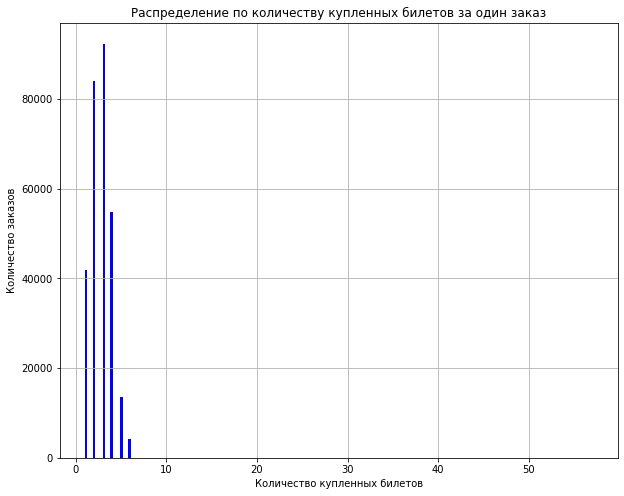

In [15]:
fto_df['tickets_count'].plot(kind = 'hist', bins = 200, color = 'blue', title = 'Распределение по количеству купленных билетов за один заказ',
                           figsize=(10,8))
plt.xlabel('Количество купленных билетов')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

Из полученной истограммы очень сложно сделать оценку количества купленных билетов за один раз, стоит также построить ящик с усами.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


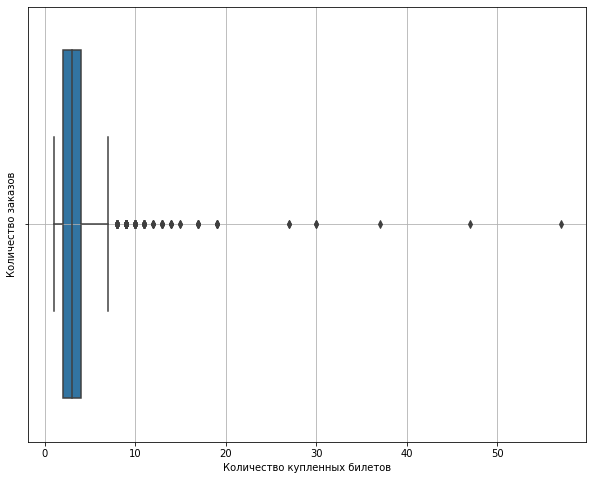

In [16]:
plt.figure(figsize = (10,8))
sns.boxplot(fto_df['tickets_count'])
plt.xlabel('Количество купленных билетов')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


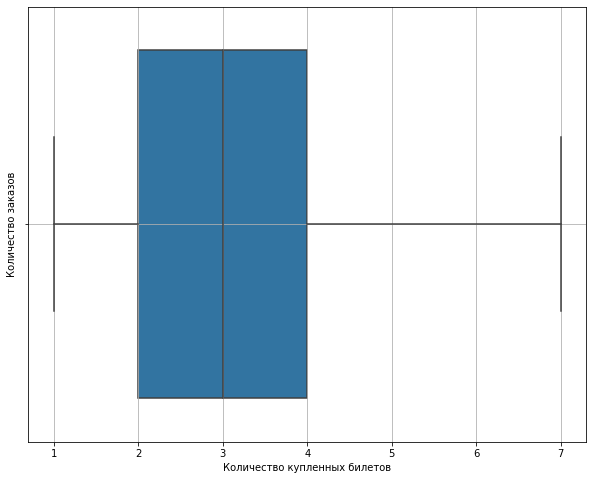

In [17]:
plt.figure(figsize = (10,8))
sns.boxplot(fto_df['tickets_count'], showfliers = False)
plt.xlabel('Количество купленных билетов')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

Из поулченных графиков распределения и оценки, а также статистических показателей по полю "Количество билетов" заметно ч то в данных присутствуют выбросы. Чаще всего в одном заказе покупют от 2 до 4 билетов. Медиана и среднее отличаются (последнее меньше первого), что говорит о неравномерности распределения и влиянию меньших значений на среднее. Также, учитывая что среднее меньше, чем медиана, то количество значений - выбросов небольшое. Максимальное количество билетов, купленных в рамках одного заказа составляет 57 штук. Возможно один человек покупал билеты на группу людей (например посещение школьников в театр или кино). Из ворого ящика "с усами" заметно, что предельно допустимое значенисоставляет 7. Оценим какое количество значений можно отнести к выбросам.

In [18]:
fto_df['tickets_count'][fto_df['tickets_count'] > 7].count()/fto_df.shape[0]*100

0.043321448586723696

Количество таких заказов - выбросов не большое и их вполне можно будет убрать в дальнейшем. 

In [19]:
# Теперь првоверим статистические значения по полю выручки
fto_df['revenue'][fto_df['currency_code'] == 'rub'].describe()

count    285780.000000
mean        547.568333
std         871.524559
min         -90.760000
25%         113.827500
50%         346.100000
75%         791.700000
max       81174.540000
Name: revenue, dtype: float64

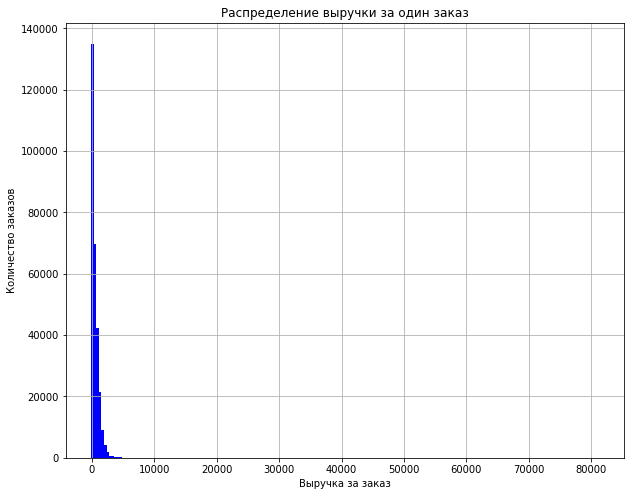

In [20]:
fto_df['revenue'][fto_df['currency_code'] == 'rub'].plot(kind = 'hist', bins = 200, color = 'blue', title = 'Распределение выручки за один заказ',
                           figsize=(10,8))
plt.xlabel('Выручка за заказ')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


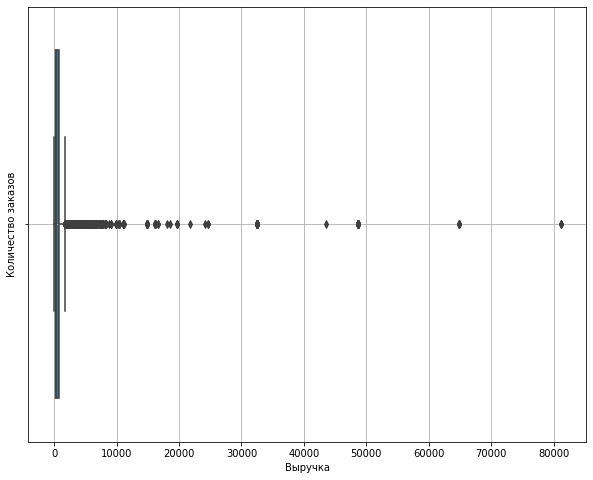

In [21]:
plt.figure(figsize = (10,8))
sns.boxplot(fto_df['revenue'][fto_df['currency_code'] == 'rub'])
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


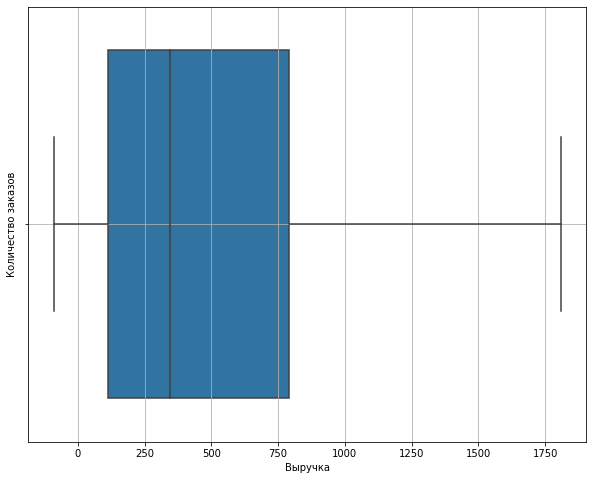

In [22]:
plt.figure(figsize = (10,8))
sns.boxplot(fto_df['revenue'][fto_df['currency_code'] == 'rub'], showfliers = False)
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

In [23]:
IQR = fto_df['revenue'][fto_df['currency_code'] == 'rub'].quantile(0.75) - fto_df['revenue'][fto_df['currency_code'] == 'rub'].quantile(0.25)
display(fto_df['revenue'][fto_df['currency_code'] == 'rub'].quantile(0.75)+IQR*1.5)

1808.5087500000002

Из полученных статистчиеских показателей заметно, что большинство значений по выручке расположено в промежутке от 113 до 792 рубля, при этом медиана составляет 346 рублей. Среднее равно 547 рублей, что говорит о влиянии выбросов на него, также о большой вариативности данных говорит среднеквадратичное отклонение равное 871.

Из гисторгаммы видно, что распределение неравномерно, она ассиметрично с удлинненым правым хвостом. Это же заметно и по ящику с усами с выбросами. Математическим способом была вычислена граница правого уса, которая составляет 1808,5 руб. Следует оценить количество выбросов.

In [24]:
fto_df['revenue'][(fto_df['revenue'] > 1808.5) & (fto_df['currency_code'] == 'rub')].count()/fto_df.shape[0]*100

3.4994103469497917

Здесь количество выбросов значительно выше, чем в предыдущем случае с билетами и составляет 3,5% от всех данных. 

In [25]:
#Теперь проверим данные по тенге
fto_df['revenue'][fto_df['currency_code'] == 'kzt'].describe()

count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

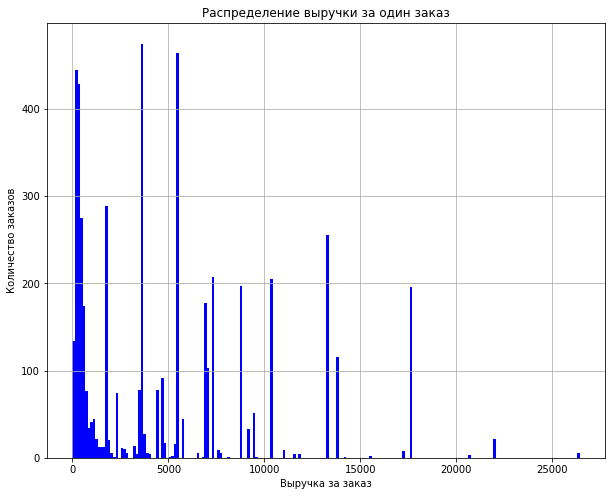

In [26]:
fto_df['revenue'][fto_df['currency_code'] == 'kzt'].plot(kind = 'hist', bins = 200, color = 'blue', title = 'Распределение выручки за один заказ',
                           figsize=(10,8))
plt.xlabel('Выручка за заказ')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


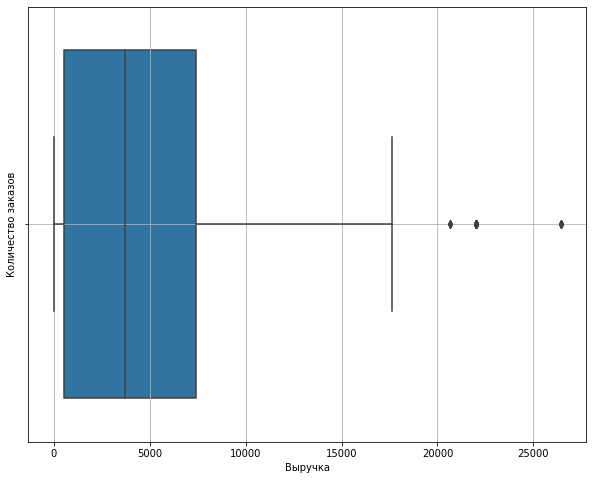

In [27]:
plt.figure(figsize = (10,8))
sns.boxplot(fto_df['revenue'][fto_df['currency_code'] == 'kzt'])
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


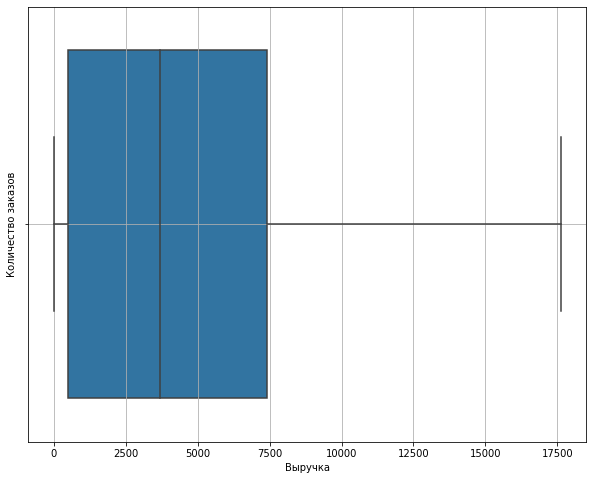

In [28]:
plt.figure(figsize = (10,8))
sns.boxplot(fto_df['revenue'][fto_df['currency_code'] == 'kzt'], showfliers = False)
plt.xlabel('Выручка')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

In [29]:
IQR_kzt = fto_df['revenue'][fto_df['currency_code'] == 'kzt'].quantile(0.75) - fto_df['revenue'][fto_df['currency_code'] == 'kzt'].quantile(0.25)
display(fto_df['revenue'][fto_df['currency_code'] == 'kzt'].quantile(0.75)+IQR_kzt*1.5)

17717.0

Чаще всео выручка от продаже  составляет от 518 до 7400 тенге. При этом медиана равна 3700. Среднее - 4995. Это говорит о том, что выбросы вновь присутсвюут и влияют на среднее. Максимальная выручка с продаже составила 26425 тенге. Из графиков видно, что распределение также неравномерно и имеет правый хвост. Ящик с усами демострирует, что выбросы в данных присутсвуют. Стоит оценить им количество.

In [30]:
fto_df['revenue'][(fto_df['revenue'] > 17717) & (fto_df['currency_code'] == 'kzt')].count()/fto_df.shape[0]*100

0.00997080959535704

Количество значений выбросов в данном случае невелико и от них также можно избавиться.

В основных количественных полях рассмотрены статистические значения и их распределение. В данных присутствуют выбросы, что плохо скажется на последующем анализе, окончательно выбросы будут убраны после. 

In [31]:
# Проверим наличие явных дубликатов 
fto_df.duplicated().sum()

0

Явных дубликатов в записях не найдено.

In [32]:
# Проверим наличие неявных дубликатов 
fto_df.duplicated(subset = fto_df.columns.delete(0)).sum()

30

Проверка дубликатов проведена по основным полям: индентификатору пользователя, времени оформления заказа, идентификатору мероприятия, выручке и количеству приобретаемых билетов. Суммарно найдено 30 дубликата.

В начале раздела были рассмотрены категориальные данные, ошибок в названии и дублирования обнаружено не было, что может говорить о том, что неявных дубликатов вызванных по причине опечатки в данных не обнаружено.

Удалим явные дубликаты из датафрейма

In [33]:
fto_df.drop_duplicates(subset = fto_df.columns.delete(0), keep = 'first')

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,Весь в билетах,4,9655.73,0.0
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,Весь в билетах,6,14483.60,0.0
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,Прачечная,2,4473.74,3.0
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,Билеты без проблем,2,6615.34,NaN


Первоначальное количество данных уменьшилось и теперь составляет 290809 строк.

In [34]:
# Преобразуем типы данных в датафреймах
fto_df['created_dt_msk'] = pd.to_datetime(fto_df['created_dt_msk'])
fto_df['created_ts_msk'] = pd.to_datetime(fto_df['created_ts_msk'])
fto_df['age_limit'] = pd.to_numeric(fto_df['age_limit'], downcast = 'integer')
fto_df['tickets_count'] = pd.to_numeric(fto_df['tickets_count'], downcast = 'integer')

fte_df['city_id'] = pd.to_numeric(fte_df['city_id'], downcast = 'integer')
fte_df['venue_id'] = pd.to_numeric(fte_df['venue_id'], downcast = 'integer')

ftt_df['nominal'] = pd.to_numeric(ftt_df['nominal'], downcast = 'integer')
ftt_df['data'] = pd.to_datetime(ftt_df['data'])

In [35]:
# Добавим новый столбик, где будет представлена выручка в рублях
fto_df_plus = fto_df.merge(ftt_df, left_on = ['created_dt_msk', 'currency_code'], right_on = ['data', 'cdx'], how = 'left')
fto_df_plus[['nominal', 'curs']] = fto_df_plus[['nominal', 'curs']].fillna(1)
fto_df_plus['revenue_rub'] = fto_df_plus['revenue'] / fto_df_plus['nominal'] * fto_df_plus['curs']
fto_df_plus = fto_df_plus.drop(['nominal', 'curs', 'cdx', 'data'], axis = 1)
fto_df_plus

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.94
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.45
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.57
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.49
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,Весь в билетах,4,9655.73,0.0,965.57
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,Весь в билетах,6,14483.60,0.0,1448.36
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,Прачечная,2,4473.74,3.0,178.95
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,Билеты без проблем,2,6615.34,NaN,661.53


In [36]:
# Добавим новые столбцы с выручкой за один билет и с месяцем
fto_df_plus['one_tickets_revenue_rub'] = fto_df_plus['revenue_rub'] / fto_df_plus['tickets_count']
fto_df_plus['month'] = fto_df_plus['created_dt_msk'].dt.month
fto_df_plus['month'].value_counts()

10    100221
9      69976
8      45044
7      40925
6      34683
Name: month, dtype: int64

In [37]:
def month_and_seasons(row):
    if row['month'] == 6:
        return 'Июнь'
    elif row['month'] == 7:
        return 'Июль'
    elif row['month'] == 8:
        return 'Август'
    elif row['month'] == 9:
        return 'Сентябрь'
    elif row['month'] == 10:
        return 'Октябрь'
    
    
    
    
fto_df_plus['month'] = fto_df_plus.apply(month_and_seasons, axis = 1)

In [38]:
def seasons(row):
    if row['month'] == 'Июнь' or row['month'] == 'Июль' or row['month'] == 'Август':
        return 'Лето'
    else:
        return 'Осень'
    
fto_df_plus['season'] = fto_df_plus.apply(seasons, axis = 1)

In [39]:
fto_df_plus

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_tickets_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.94,380.485000,Август,Лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.45,144.725000,Июль,Лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.57,314.642500,Октябрь,Осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.49,4.245000,Июль,Лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.41,463.470000,Октябрь,Осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,Весь в билетах,4,9655.73,0.0,965.57,241.392500,Октябрь,Осень
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,Весь в билетах,6,14483.60,0.0,1448.36,241.393333,Октябрь,Осень
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,Прачечная,2,4473.74,3.0,178.95,89.475000,Октябрь,Осень
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,Билеты без проблем,2,6615.34,NaN,661.53,330.765000,Сентябрь,Осень


Теперь, после того как все данные подготовлены избавимся от выбросов по полям выручки в рублях и количеству билетов. Для этого возьмем значения квантиля в 0.99.

In [40]:
fto_df_plus_wf = fto_df_plus[(fto_df_plus['revenue_rub'] < fto_df_plus['revenue_rub'].quantile(0.99)) |
                             (fto_df_plus['tickets_count'] < fto_df_plus['tickets_count'].quantile(0.99))]
display(fto_df_plus_wf)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_tickets_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.94,380.485000,Август,Лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.45,144.725000,Июль,Лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.57,314.642500,Октябрь,Осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.49,4.245000,Июль,Лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.41,463.470000,Октябрь,Осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,Весь в билетах,4,9655.73,0.0,965.57,241.392500,Октябрь,Осень
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,Весь в билетах,6,14483.60,0.0,1448.36,241.393333,Октябрь,Осень
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,Прачечная,2,4473.74,3.0,178.95,89.475000,Октябрь,Осень
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,Билеты без проблем,2,6615.34,NaN,661.53,330.765000,Сентябрь,Осень


На этом этапе предобработка данных завершена.

In [41]:
display('Было отсеяно:', lens - fto_df_plus_wf.shape[0])
display('Осталось:', fto_df_plus_wf.shape[0])

'Было отсеяно:'

346

'Осталось:'

290503

### Промежуточный вывод по разделу:

В ходе раздела было реализована преодбработка данных.  
Были выполнены слеудющие шаги:
- Изучены категориальные значения, проверены на отсуствие повторов в виду опечаток а также наличие значений, которые могут означать пропуск  или отсутствие данных;
- Изучены основные количественные значения по полям выручки и количество купленных билетов, найдены выбросы в данных;
- Найдены и удалены неявные дубликаты;
- Выполнено преобразование типов данных на более оптимальные и подходящие для дальнейшей работы;
- Добавлены новые поля, в которых хранится информация и выручке в рублях, месяце и сезоне оформления заказа, а также о полученной выручки за покупку одного билета.
- Удалены выбросы в записях по полям выручка в рублях и количество приобритенных билетов.

В итоге после предобработки данных и удаления дубликатов и выбросов осталось 290459 записей, было удалено 390 записей. Количество удаленно записей составляет менее 1%, а объема данных достаточно для проведения исследовательского анализа и оценке гипотез.


<a class="anchor" id="4_charter"></a> 
## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

In [42]:
# Найдем количество заказов по месяцам
fto_df_plus_wf.groupby('month')['order_id'].count().sort_values(ascending = False)

month
Октябрь     100103
Сентябрь     69881
Август       45000
Июль         40883
Июнь         34636
Name: order_id, dtype: int64

Из данных заметно, что в лентние месяцы количество заказов постепенно увеличивается, при этом в осеннии месяцы увелчение происходит более резко. Особенно это заметно в октябре, где количество заказов больше всего.  
Рассмотрим как менялось количество заказов по месяцам и по другим категориям.

In [43]:
# Для начала объеденим данные двух датафреймов
all_df = fto_df_plus_wf.merge(fte_df, on = 'event_id')
all_df

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7431164,024dc5236465850,2024-07-23,2024-07-23 20:52:02,169230,нет,16,rub,mobile,1902.42,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
2,7431106,024dc5236465850,2024-07-23,2024-07-23 20:54:19,169230,нет,16,rub,mobile,1141.45,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
3,7431135,024dc5236465850,2024-07-23,2024-07-23 20:59:44,169230,нет,16,rub,mobile,1902.42,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
4,7431048,024dc5236465850,2024-07-23,2024-07-23 21:02:08,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290260,7375078,ff684621b134cc4,2024-10-06,2024-10-06 12:32:09,12820,нет,18,rub,desktop,279.82,...,a59dafa6-f5a0-4c98-a460-5f6bb27218df,спектакль,театр,№1871,Каменевский регион,Глиногорск,213,4574,"Архив ""Туман"" Лимитед","ш. Водопроводное, д. 87 стр. 572"
290261,343390,ff684621b134cc4,2024-10-31,2024-10-31 12:27:42,357588,нет,6,rub,mobile,427.06,...,f56f3d67-4673-4fb3-b202-3f2bfd39fcf6,мюзикл,театр,№1469,Североярская область,Озёрск,2,2303,"Санкт-Петербургский дом культуры ""Сказка"" Лтд","алл. Макарова, д. 5/2"
290262,7378935,ff6bf53a0207b52,2024-10-02,2024-10-02 20:58:31,300765,нет,6,rub,mobile,224.88,...,cf71bf2b-8e5c-47e0-a0f3-c2d4910c4677,спектакль,театр,№4915,Североярская область,Озёрск,2,3850,"Творческое объединение ""Ветер"" Инкорпорэйтед","пр. Тупиковый, д. 9 стр. 8"
290263,195084,ffdadadd5de9c4b,2024-07-22,2024-07-22 13:44:54,540339,нет,6,rub,desktop,92.18,...,f17a01b7-3cd3-4cd1-919c-3459bd074886,концерт,концерты,№1742,Светополянский округ,Глиноград,54,3692,"Цирк ""Зависть"" Групп","ул. Красина, д. 64 стр. 5/7"


После объединения данных осталось 290221 запись (было 290459) это говорит о том, что есть ряд заказов, у которых нет информации о мероприятии. Также как и в прошлый раз, такие данные стоит удалить, поскольку их немного и ими можно принеберсь (приблизитель 0,1%).

In [44]:
all_df.groupby(['season', 'event_type_main'])['order_id'].count()

season  event_type_main
Лето    выставки            2417
        другое             32567
        концерты           51451
        спорт               3013
        стендап             6392
        театр              24188
        ёлки                 275
Осень   выставки            2437
        другое             33280
        концерты           63597
        спорт              18898
        стендап             6982
        театр              43061
        ёлки                1707
Name: order_id, dtype: int64

season,Лето,Осень
event_type_main,,
выставки,2417,2437
другое,32567,33280
концерты,51451,63597
спорт,3013,18898
стендап,6392,6982
театр,24188,43061
ёлки,275,1707


<Figure size 720x576 with 0 Axes>

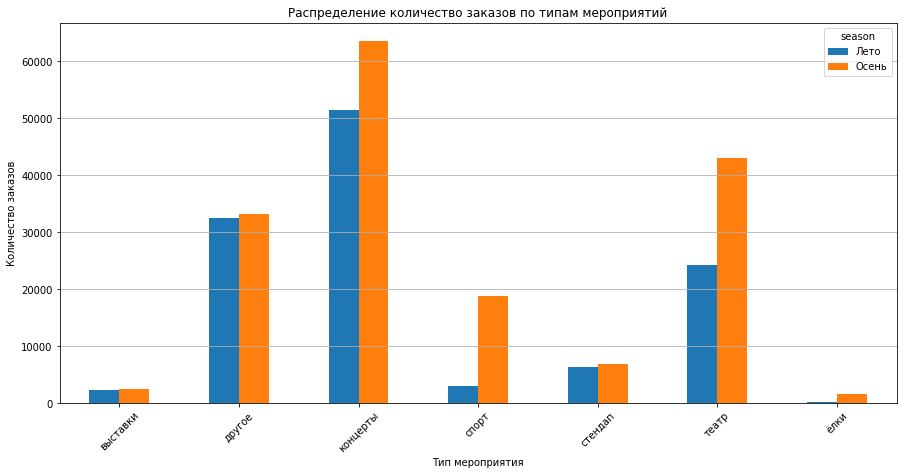

In [45]:
plt.figure(figsize = (10,8))
pivot_table = all_df.pivot_table(values = 'order_id', index = 'event_type_main', columns = 'season', aggfunc = 'count')
display(pivot_table)
pivot_table.plot(kind = 'bar', title = 'Распределение количество заказов по типам мероприятий', xlabel = 'Тип мероприятия',
                ylabel = 'Количество заказов', rot = 45, figsize = (15,7))
plt.grid(axis = 'y')
plt.show()

При рассмотрении распределения количества заказов по мероприятиям заметно, что осенью  по всем типам мероприятий юыло больше заказов чем летом. Однако, стоит также учитывать, что заказов осенью было больше, поэтому чтобы оценить тенденцию заказов по определенному типу мероприятия стоит посмотреть как распределеились заказы в долевом соотношении.

event_type_main,выставки,другое,концерты,спорт,стендап,театр,ёлки,All
season,,,,,,,,
Лето,2417,32567,51451,3013,6392,24188,275,120303
Осень,2437,33280,63597,18898,6982,43061,1707,169962


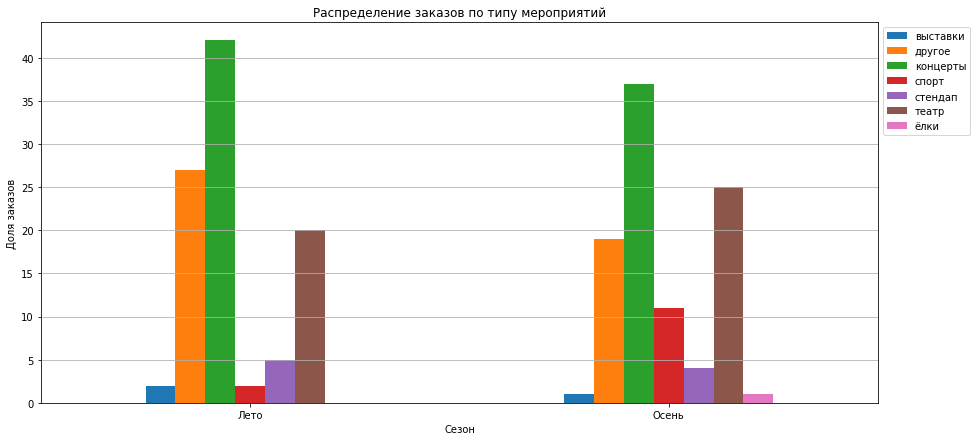

In [46]:
pivot_table = all_df.pivot_table(values = 'order_id', index = 'season', columns = 'event_type_main', aggfunc = 'count', margins = True)
pivot_table.drop('All', inplace = True)
display(pivot_table)
for i in pivot_table.columns:
    for j in pivot_table.index:
        pivot_table[i][j] = round((pivot_table[i][j] / pivot_table['All'][j]) * 100,2)
pivot_table.drop(columns = 'All', inplace = True)
pivot_table.plot(kind = 'bar', figsize=(15,7), xlabel = 'Сезон', title = 'Распределение заказов по типу мероприятий', ylabel = 'Доля заказов', rot = 0)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(axis = 'y')
plt.show()

Из графика видно, что летом при оформлении заказа самыми популярными были концерты, "другое" и театры. При этом осенью тенденция заказов немного изменилась. Концерты так же остались самыми популярными, однако пользователи стали чаще приобретать билеты в театр, также резко увеличился интерес к спортивным меропритиям и елкам. При росте количества заказов такие мероприятия как другие, выставки и стендапы не преобрели особого успеха в росте посетителей.

In [47]:
all_df.groupby(['season', 'device_type_canonical'])['order_id'].count()

season  device_type_canonical
Лето    desktop                   23407
        mobile                    96896
Осень   desktop                   34638
        mobile                   135324
Name: order_id, dtype: int64

season,Лето,Осень
device_type_canonical,,
desktop,23407,34638
mobile,96896,135324


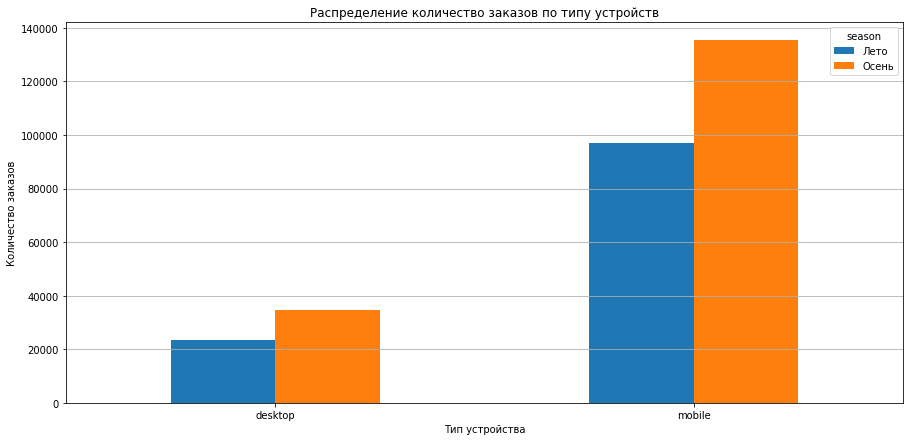

In [48]:
pivot_table = all_df.pivot_table(values = 'order_id', index = 'device_type_canonical', columns = 'season', aggfunc = 'count')
display(pivot_table)
pivot_table.plot(kind = 'bar', title = 'Распределение количество заказов по типу устройств', xlabel = 'Тип устройства',
                ylabel = 'Количество заказов', rot = 0, figsize=(15,7))
plt.grid(axis = 'y')
plt.show()

device_type_canonical,desktop,mobile,All
season,,,
Лето,23407,96896,120303
Осень,34638,135324,169962


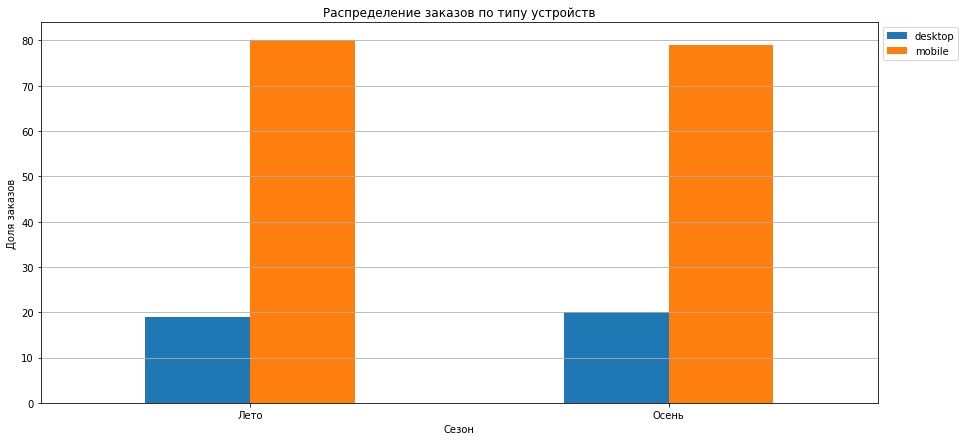

In [49]:
pivot_table = all_df.pivot_table(values = 'order_id', index = 'season', columns = 'device_type_canonical', aggfunc = 'count', margins = True)
pivot_table.drop('All', inplace = True)
display(pivot_table)
for i in pivot_table.columns:
    for j in pivot_table.index:
        pivot_table[i][j] = round((pivot_table[i][j] / pivot_table['All'][j]) * 100,2)
pivot_table.drop(columns = 'All', inplace = True)
pivot_table.plot(kind = 'bar', figsize=(15,7), xlabel = 'Сезон', title = 'Распределение заказов по типу устройств', ylabel = 'Доля заказов', rot = 0)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(axis = 'y')
plt.show()

Количество пользователей, осуществляющих заказ с телефона почти в 4 раза больше чем с компьютера. Из графиков видно, что заказов совершенных с телефонов и с компьютеров осенью больше чем летом, однако в долевом соотношении результаты почти не изменились (осенью доля заказов совершенных с  компьютера стала чуть больше чем летом).

In [50]:
all_df.groupby(['season', 'age_limit'])['order_id'].count()

season  age_limit
Лето    0            21607
        6            21933
        12           24765
        16           33978
        18           18020
Осень   0            39862
        6            30138
        12           37597
        16           44495
        18           17870
Name: order_id, dtype: int64

season,Лето,Осень
age_limit,,
0,21607,39862
6,21933,30138
12,24765,37597
16,33978,44495
18,18020,17870


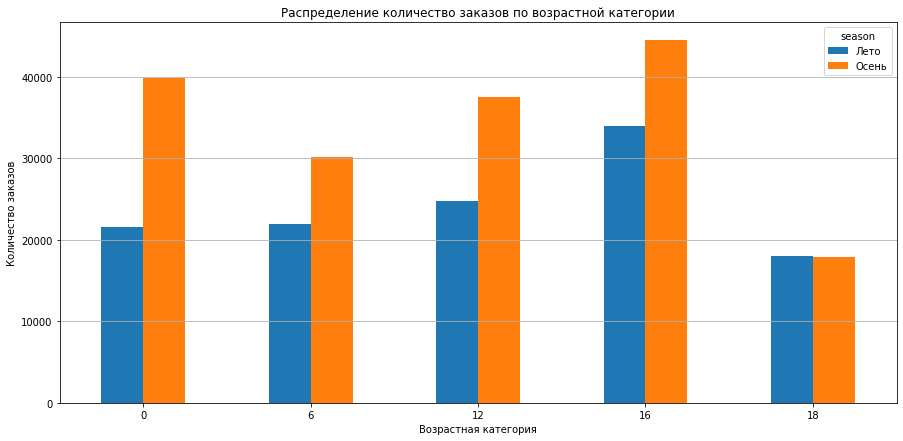

In [51]:
pivot_table = all_df.pivot_table(values = 'order_id', index = 'age_limit', columns = 'season', aggfunc = 'count')
display(pivot_table)
pivot_table.plot(kind = 'bar', title = 'Распределение количество заказов по возрастной категории', xlabel = 'Возрастная категория',
                ylabel = 'Количество заказов', rot = 0, figsize=(15,7))
plt.grid(axis = 'y')
plt.show()

age_limit,0,6,12,16,18,All
season,,,,,,
Лето,21607,21933,24765,33978,18020,120303
Осень,39862,30138,37597,44495,17870,169962


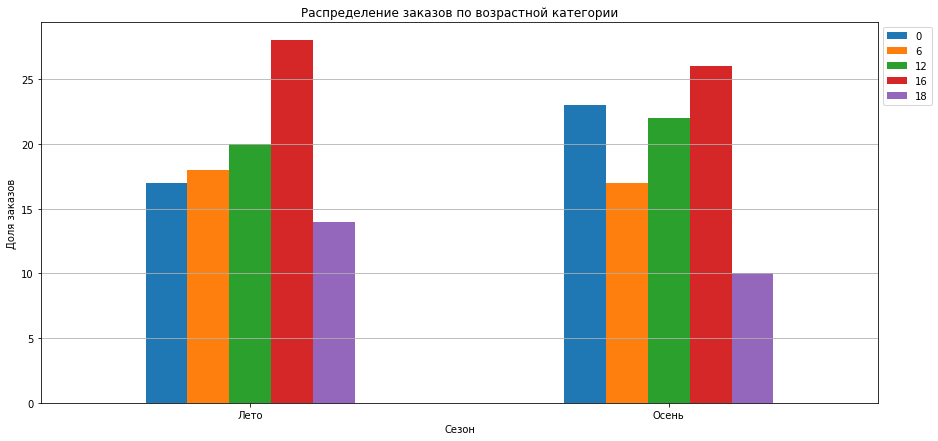

In [52]:
pivot_table = all_df.pivot_table(values = 'order_id', index = 'season', columns = 'age_limit', aggfunc = 'count', margins = True)
pivot_table.drop('All', inplace = True)
display(pivot_table)
for i in pivot_table.columns:
    for j in pivot_table.index:
        pivot_table[i][j] = round((pivot_table[i][j] / pivot_table['All'][j]) * 100,2)
pivot_table.drop(columns = 'All', inplace = True)
pivot_table.plot(kind = 'bar', figsize=(15,7), xlabel = 'Сезон', title = 'Распределение заказов по возрастной категории', ylabel = 'Доля заказов', rot = 0)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(axis = 'y')
plt.show()

По полученным данным, самой популярной возрастной категорией является 16+. Осенью почти во всех категориях количество заказов увеличилось, за исключением категории 18+. Однако разница небольшая (чуть больше 100 заказов). Однако, при рассмотрении долевого сотношения заказов в сезоне можно заметить новые тренды. Осенью большую популярность получили мероприятия категории 0+, а также увеличилось доля заказов билетов на мероприятия категории 12+. Доля присуствия категории 16+ среди всех заказов осень уменьшилась, однако продолжает быть топовой категорией среди оставшихся.

In [53]:
# Изучим изменение в значении выручки, полученной с одного билета
all_df.groupby(['season', 'event_type_main'])['one_tickets_revenue_rub'].mean()

season  event_type_main
Лето    выставки            86.388607
        другое              80.943415
        концерты           318.589737
        спорт               54.112065
        стендап            226.596884
        театр              222.121563
        ёлки               274.749549
Осень   выставки            91.066619
        другое              76.943437
        концерты           286.109052
        спорт               52.132324
        стендап            249.586575
        театр              182.664170
        ёлки               233.464783
Name: one_tickets_revenue_rub, dtype: float64

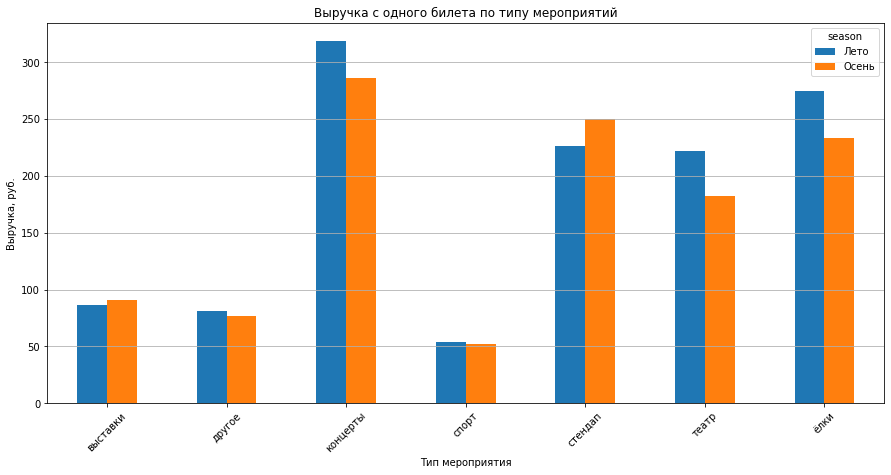

season,Лето,Осень,"разница, %"
event_type_main,,,
выставки,86.388607,91.066619,5.415080
другое,80.943415,76.943437,-4.941697
концерты,318.589737,286.109052,-10.195145
спорт,54.112065,52.132324,-3.658594
стендап,226.596884,249.586575,10.145634
театр,222.121563,182.664170,-17.763873
ёлки,274.749549,233.464783,-15.026327


In [54]:
revenue_ticket_table = all_df.pivot_table(values = 'one_tickets_revenue_rub', index = 'event_type_main', columns = 'season', aggfunc = 'mean')
revenue_ticket_table.plot(kind = 'bar', figsize = (15,7), title = 'Выручка с одного билета по типу мероприятий', xlabel = 'Тип мероприятия',
                          ylabel = 'Выручка, руб.', rot = 45)
plt.grid(axis = 'y')
plt.show()
revenue_ticket_table['разница, %'] = (revenue_ticket_table['Осень'] - revenue_ticket_table['Лето']) / revenue_ticket_table['Лето'] * 100
revenue_ticket_table

Из графиков заметно, что в большинстве типов мероприятий среднее значение выручки за один билет в заказе осенью уменьшилось от 3 до 17%. Исключением стали такие мероприятия как выставки - увеличилось на 5% и стендапы - 10%. Учитывая тенденции, обнаруженные ранее, можно предположить, что эти два события связаны: чем меньше стала выручка, тем популярнее стали типы мероприятий осенью.

**ВЫВОД:**

С наступлением осени количество оформляемых заказов значительно увеличилось. Самыми популярными мероприятиями являются концерты, другое и театры. По сравнению с летним периодом осенью интерес пользователей значительно увеличился к таким мероприятиям как театры, спортивные мероприятия и елки. Меньше всего увеличились выставки и стендапы. Также заметны небольшие изменения в устройствах, с которых были оформлены билеты (осенью доля пользователей, оформивших заказ с компьютера стала чуть больше чем летом). Измнения заметны в возрастной категории мероприятий. Категория 16+ безоговорочный лидер в продаж, однако популярность по сравннеию с летним периодом осенью получили такие категории как 0+ и 12+ (возможно это связано с окончанием каникул в школах, часто в школах учеников водят в театры, или же возвращением из отпусков и летних лагерей - родители чаще стали ходить с детьми на мероприятия). 

Особено значимы изменения в средней выручки, полученной за один билет. Оснеью по всем мероприятиям выручка снизилась от 3 до 17 процентов, искючение - выставки и стендапы выручка с которых выросла. Предположительно, увеличение количества заказов осенью может быть связан именно с этим (изменилась стоимость билетов и как итог - выручка, при этом увеличилась стоимость).

### Осенняя активность пользователей

In [55]:
# Создадим сводную таблицу, в которую соберем следующие поля по дням:
# - общее число заказов
# - количество активных пользователей
# - среднее число заказов на одного пользователя
# - средняя стоимость одного билета
pt_days = all_df[(all_df['month'] == 'Сентябрь') | (all_df['month'] == 'Октябрь')].pivot_table(values = ['order_id', 'user_id', 'one_tickets_revenue_rub'], 
                                                                                                index = 'created_dt_msk', aggfunc = {'order_id' : 'count', 'user_id' : 'nunique', 'one_tickets_revenue_rub' : 'mean'})
pt_days.columns = ['Средняя стоимость билета', 'Количество заказов', 'Количество пользователей']
pt_days['Среднее число заказов на пользователя'] = pt_days['Количество заказов'] / pt_days['Количество пользователей']
pt_days

,Средняя стоимость билета,Количество заказов,Количество пользователей,Среднее число заказов на пользователя
created_dt_msk,,,,
2024-09-01,206.407230,1340,567,2.363316
2024-09-02,195.536090,1391,580,2.398276
2024-09-03,81.886188,5122,782,6.549872
2024-09-04,183.675947,1782,688,2.590116
2024-09-05,193.213086,1956,743,2.632571
...,...,...,...,...
2024-10-27,190.848377,2866,1039,2.758422
2024-10-28,176.724348,2860,988,2.894737
2024-10-29,189.784035,2886,1004,2.874502


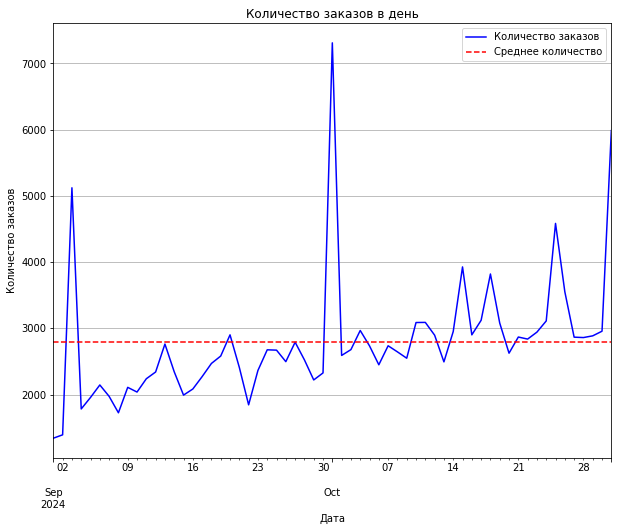

In [60]:
plt.figure(figsize = (10,8))
pt_days['Количество заказов'].plot(kind = 'line', color = 'blue', 
                                   title = 'Количество заказов в день', 
                                   xlabel = 'Дата',
                                   ylabel = 'Количество заказов')
mean_order = pt_days['Количество заказов'].mean()
plt.axhline(mean_order, color = 'red', linestyle = '--', label = 'Среднее количество')
plt.legend()
plt.grid(axis = 'y')
plt.show()

На графике предсталено распеделение заказов по датам в сентябре и октябре. Заметны всплески - выбросы в количестве заказов в конце месяца - начале следующего. По графику также видно, что в сентябре дней с количеством заказов меньше среднего значительно меньше чем в октябре, таким образом прорисовывается положительная тенденция к оформлению заказа.

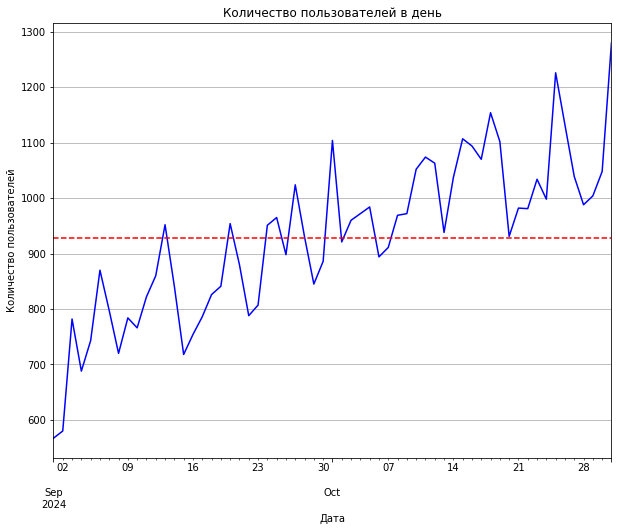

In [61]:
plt.figure(figsize = (10,8))
pt_days['Количество пользователей'].plot(kind = 'line', color = 'blue', 
                                   title = 'Количество пользователей в день', 
                                   xlabel = 'Дата',
                                   ylabel = 'Количество пользователей')
plt.axhline(pt_days['Количество пользователей'].mean(), color = 'red', linestyle = '--', label = 'Среднее количество')
plt.legend()
plt.grid(axis = 'y')
plt.show()

В среднем ежедневно сервис используют чуть больше 900 пользователей. Заметна положительная динамика в количестве уникальных пользователей использующих приложение.

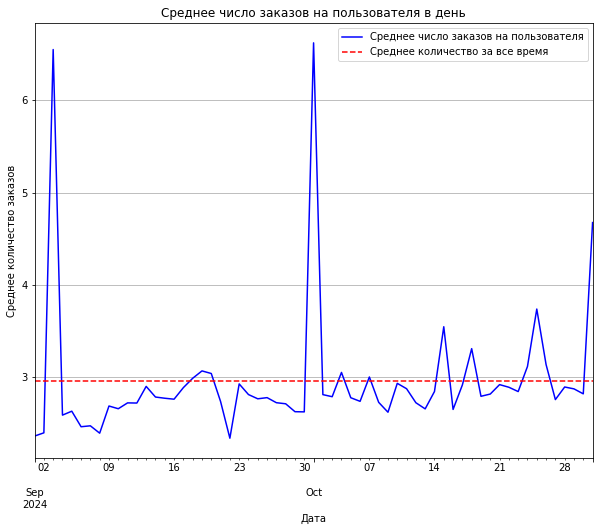

In [63]:
plt.figure(figsize = (10,8))
pt_days['Среднее число заказов на пользователя'].plot(kind = 'line', color = 'blue', 
                                   title = 'Среднее число заказов на пользователя в день', 
                                   xlabel = 'Дата',
                                   ylabel = 'Среднее количество заказов')
plt.axhline(pt_days['Среднее число заказов на пользователя'].mean(), color = 'red', linestyle = '--', label = 'Среднее количество за все время')
plt.legend()
plt.grid(axis = 'y')
plt.show()

График очень напоминает предыдущий (Количество заказов в день). Также как и там, здесь присутствуют всплески в конце месяца - начале следующего. Динамика среднего количества заказов в день увеличивается, однако в отличии от количества заказов менее интенсивно. Это говорит о том, что пользователи все больше заинтерсованы в покупке билетов через сервис. Учитывая такие всплески, можно предположить что многие пользователи заказывают билеты на месяц вперед из-за получения зарплаты и планирования своих развлечений. 

***Вот так деньги и уходят - в день зарплаты)***

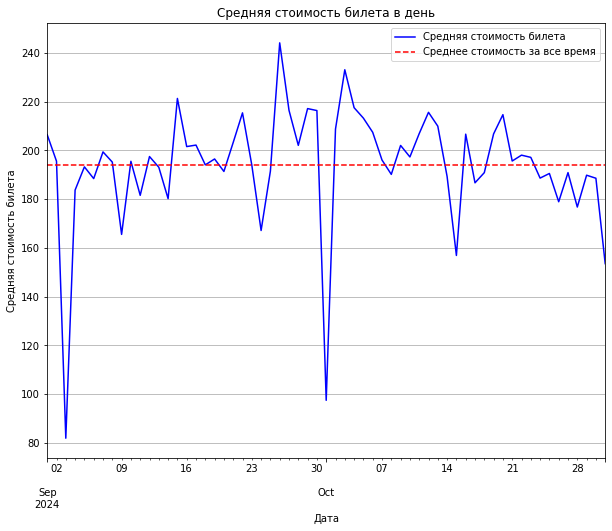

In [64]:
plt.figure(figsize = (10,8))
pt_days['Средняя стоимость билета'].plot(kind = 'line', color = 'blue', 
                                   title = 'Средняя стоимость билета в день', 
                                   xlabel = 'Дата',
                                   ylabel = 'Средняя стоимость билета')
plt.axhline(pt_days['Средняя стоимость билета'].mean(), color = 'red', linestyle = '--', label = 'Среднее стоимость за все время')
plt.legend()
plt.grid(axis = 'y')
plt.show()

В отличии от остальных графиков, средняя выручка с одного не несет положительной тенденции, она почти постоянна, за исключением дней массовой покупки билетов. В качестве причины может быть наличие какой-либо акции или же процесс расчета выручки.

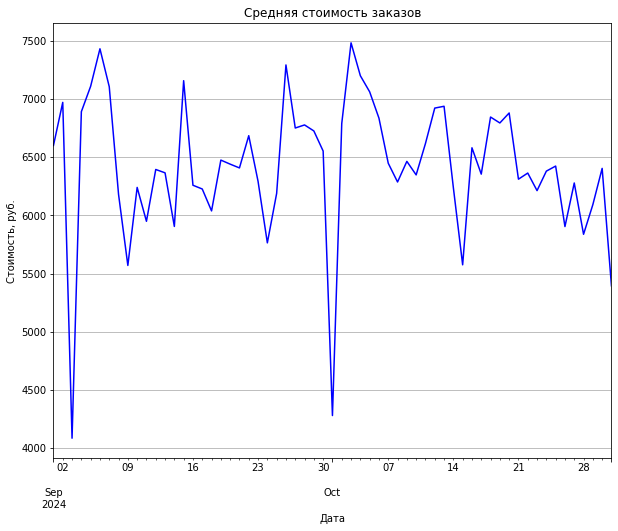

In [67]:
# Ради интереса
plt.figure(figsize = (10,8))
all_df[(all_df['month'] == 'Сентябрь') | (all_df['month'] == 'Октябрь')].groupby('created_dt_msk')['total'].mean().plot(kind = 'line',
                                                                                                                       title = 'Средняя стоимость заказов',
                                                                                                                       xlabel = 'Дата',
                                                                                                                       ylabel = 'Стоимость, руб.',
                                                                                                                       color = 'blue')
plt.grid (axis = 'y')
plt.show()

Все же учитывая что количество заказов в эти дни больше чем в предыдущие как и количество оформляемых заказов пользователями, при почти единых значениях в количестве уникальных пользователей, скорее всего в эти дни проходят какие-то акции или же же в начале месяца билеты более дешевые, в отличии от последующих дней, как следствие выручка - процент от суммы покупки.

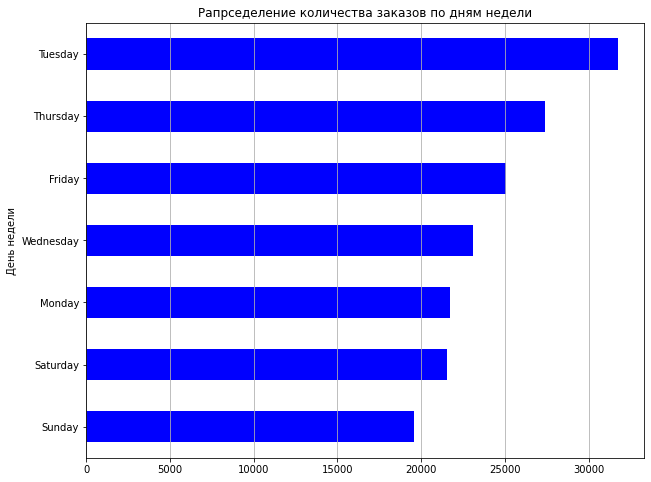

In [68]:
#Изучим пользовательскую активность по дням недели
order_day = all_df[(all_df['month'] == 'Сентябрь') | (all_df['month'] == 'Октябрь')].groupby('created_dt_msk')['order_id'].count().reset_index()
order_day['day'] = order_day['created_dt_msk'].dt.day_name()
plt.figure(figsize = (10,8))
order_day.groupby('day')['order_id'].sum().sort_values().plot(kind = 'barh', color = 'blue', 
                                                             title = 'Рапрседеление количества заказов по дням недели',
                                                             xlabel = 'День недели',
                                                             ylabel = 'Количество заказов')
plt.grid (axis = 'x')
plt.show()

Больше всего билетов пользователи заказывают во вторник и в четверг, а меньше всего - на выходных.

**ВЫВОД:**

Осенняя активность пользователей демонстрирует что количество пользователей имеет положительную тенденцию, как следствие растет и количество заказов. Сренее количество заказов, оформляемых пользователями за день также имеет положительную тенденцию, однако менее интенсивную по сравнению с другими показателями. Средняя выручка с билета в отличии от остальных не демострирует роста, она скорее стабильна. 

Заметно, что большое количество заказов оформляется в начале месяца, все это связано стоимостью билетов. В начале месяца билеты дешевле, как следствие заказов  вразы больше. Это также дает понимание о том, что выручка с продажи билетво представляет собой процент от общей стоимости, так как в эти дни выручка ниже всего. 

В оснвоном пользователи покупаю билеты в будние дни, чаще всего во вторик и четверг. В выходные активность пользователей меньше.

### Популярные события и партнеры

In [69]:
# Оценим сколько мероприятий и заказов было сделано по регионам
region_date = all_df.groupby('region_name').agg({'event_id' : 'nunique', 'order_id' : 'count'}).sort_values(by = ['event_id','order_id'], ascending = False).reset_index()
region_date['share_event'] = region_date['event_id'] / fte_df.shape[0] * 100
region_date['share_order'] = region_date['order_id'] / all_df.shape[0] * 100
region_date.columns = ['Регион','Количество мероприятий', 'Количество заказов', 
                       'Доля мероприятий, %', 'Доля заказов, %']
display(region_date.head(10))
display(region_date.tail(5))

,Регион,Количество мероприятий,Количество заказов,"Доля мероприятий, %","Доля заказов, %"
0,Каменевский регион,5982,90918,26.673206,31.322412
1,Североярская область,3812,44010,16.997369,15.162007
2,Широковская область,1233,16428,5.497837,5.659656
3,Светополянский округ,1075,7603,4.793329,2.619331
4,Речиновская область,702,6291,3.130156,2.167330
5,Травяная область,683,5045,3.045436,1.738067
6,Горицветская область,551,5163,2.456860,1.778719
7,Серебринская область,542,5598,2.416730,1.928583
8,Яблоневская область,535,6152,2.385517,2.119443
9,Тепляковская область,530,4388,2.363223,1.511722


,Регион,Количество мероприятий,Количество заказов,"Доля мероприятий, %","Доля заказов, %"
76,Светолесский край,2,24,0.008918,0.008268
77,Лесноярский край,2,19,0.008918,0.006546
78,Верхозёрский край,2,11,0.008918,0.003790
79,Сосноводолинская область,2,10,0.008918,0.003445
80,Теплоозёрский округ,2,7,0.008918,0.002412


In [83]:
# Теперь оценим партнеров
service_date = all_df.groupby('service_name').agg({'event_id' : 'nunique',
                                                  'order_id' : 'count',
                                                  'revenue_rub' : 'sum'}).sort_values(by = 'revenue_rub', ascending = False).reset_index()
service_date['share_event'] = service_date['event_id'] / service_date['event_id'].sum() * 100
service_date['share_order'] = service_date['order_id'] / service_date['order_id'].sum() * 100
service_date['share_revenue'] = service_date['revenue_rub'] / service_date['revenue_rub'].sum() * 100
service_date.columns = ['Регион','Количество мероприятий', 'Количество заказов', 'Выручка',
                       'Доля мероприятий, %', 'Доля заказов, %', 'Доля выручки, %']
display(service_date.head(5))
display(service_date.tail(5))


,Регион,Количество мероприятий,Количество заказов,Выручка,"Доля мероприятий, %","Доля заказов, %","Доля выручки, %"
0,Билеты без проблем,2855,32752,1.348757e+07,16.456280,19.270190,15.316580
1,Облачко,1413,15601,1.241090e+07,8.144562,9.179111,14.093906
2,Мой билет,1012,19656,1.172736e+07,5.833189,11.564938,13.317665
3,Лови билет!,3626,25855,1.058734e+07,20.900340,15.212224,12.023053
4,Весь в билетах,607,9597,1.002921e+07,3.498761,5.646556,11.389235


,Регион,Количество мероприятий,Количество заказов,Выручка,"Доля мероприятий, %","Доля заказов, %","Доля выручки, %"
30,Быстрый кассир,1,8,7780.71,0.005764,0.004707,0.008836
31,Тех билет,2,5,1722.63,0.011528,0.002942,0.001956
32,Билеты в интернете,1,4,548.23,0.005764,0.002353,0.000623
33,Лимоны,1,1,119.93,0.005764,0.000588,0.000136
34,Зе Бест!,1,2,30.01,0.005764,0.001177,0.000034


**ВЫВОД:**

При рассмотрении популярных регионов и партнеров были получены следующие результаты:
- Каменский региона и Североярская область являются лидерами по количество проводимых мероприятий и осуществленным заказам. В  этих краях прошло свыше 43% от всех мероприятий, размещенных на Яндекс.Афише. Количество заказов, совершенных в этих областях составляет свыше 46% от общего числа заказов. Каменский регион - лидер.
- Теплоозерский округ, Сосноводолинская область, Лесноярский край, Светолесский край и Верхозерский край - аутсайдеры, в этих местах было меньше всего мероприятий и заказов
- В ТОП 3 партнера по выручке входят Билеты без проблем, Мой билет, Облачко - совместно 44% от всей выручки. Выручка от данных партнеров превышает значения в 2 млн.руб. от каждого, в то время как от остальных менее 1.8 млн.руб.
- Аутсайдеры - Кино билет, Тех билет, Лимоны, Билеты в интернете, Зе Бест! - общая выручка менее 1% в общей картине выручки.

### Промежуточный вывод:

В разделе были изучены все основные исследовательские задачи:
- о заказах и их распределении по различным категориям - заметно наличие сезонных тенденций;
- об активности пользователей - пользователей и заказов становится больше,есть дни массовой покупки билетов из-за низкой цены - дни низкой выручки за билет 
- о популярных события и партнерах - найдены популярные регионы для проведения мероприятий и ТОП 3 партнера по лучшим показателям выручки.

<a class="anchor" id="5_charter"></a> 
## Статистический анализ данных

Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств. 
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

In [71]:
all_df = all_df[all_df['season'] == 'Осень']
display(all_df['user_id'].nunique())
all_df.groupby('device_type_canonical')['user_id'].nunique()

15864

device_type_canonical
desktop     4898
mobile     14232
Name: user_id, dtype: int64

In [87]:
#Узнаем статистические показатели среднего количество заказов по группам
display(all_df[all_df['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count().describe())
display(all_df[all_df['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count().describe())

count    14232.000000
mean         9.508432
std         68.421661
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       4358.000000
Name: order_id, dtype: float64

count    4898.000000
mean        7.071866
std        36.160700
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1507.000000
Name: order_id, dtype: float64

Исходя из полученного результата можно сделать вывод о том, что почти 3500 пользователей пользовались и компьютером и телефоном при оформлении заказов, кроме того, разница в количестве пользователей превышает 25%. Кроме того, из статистических показателей видно, что значения медианы очень сильно отличается от среднего в меньшую сторону. Это говорит о влиянии выбросов, которые таке заметны по показателю "максимально значение" - для мобильной версии 4358 заказов на одного пользователя, а по компьютеру - 1507 заказов. Эти факторы говорят о том, что  использование тестов Стьюдента не представляется возможным, так как выборки пересекаются и не являются независиыми. В данном случае лучше всего подойдет тест Манни-Уитни.

Сформируем первую гипотезу:  
Нулевая (Н0) - среднее количество заказов на одного пользователя на телефоне меньше или равно чем на компьютере (M_mobile <= M_desktop)  
Альтернативная (Н1) - среднее количество заказов на одного пользоваетля  на телефоне выше чем на компьютере (M_mobile > M_desktop)  

In [72]:
# Узнаем состояние изучаемых метрик
M_mobile = all_df[all_df['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count().mean()
display(M_mobile)
M_desktop = all_df[all_df['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count().mean()
display(M_desktop)
display(f'Разница: {M_mobile - M_desktop}')

9.508431703204048

7.071866067782769

'Разница: 2.436565635421279'

Разница в количестве страниц присутствует и составлет 2,4 заказа на пользователя. Учитывая распределение данных и наличие пересчений в группах, стоит применять тест Манна-Уитни.

In [73]:
alpha = 0.05
mw_test = mannwhitneyu(
    all_df[all_df['device_type_canonical'] == 'mobile'].groupby('user_id')['order_id'].count(),
    all_df[all_df['device_type_canonical'] == 'desktop'].groupby('user_id')['order_id'].count(),
    alternative='greater'
)

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Распределения метрики в группах равны')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Распределения метрики в группах различаются')

pvalue=1.6412858633267908e-07 < 0.05
Нулевая гипотеза не находит подтверждения! Распределения метрики в группах различаются


При проведении оценки статистической значимости расхождений с помощью теста Маннау-Уитни было получено pvalue = 1.673535712895521e-07 < 0.05. Нулевая гипотеза не подтверждается, значит метрики в двух группах действительно различаются.

Сформируем вторую гипотезу:  
Нулевая (Н0) - среднее время между заказами пользователей мобильного приложения больше или равно чем у пользователей стационарных устройств (M_desktop <= M_mobile)  
Альтернативная (Н1) - среднее время между заказами пользователей мобильного приложения больше или равно чем у пользователей стационарных устройств (M_desktop > M_mobile)

Учитывая, что пользователи могут оформлять билеты как с мобильной версии приложения так и с версии для станционарных устройств, то получить точные значения времени между заказами невозможно, так как пользователь мог совершить прошлый заказ с другого устройства. Стоит выбрать только тех пользователей, которые постоянно совершают заказ с компьютера и с телефона и оценить их среднее время между заказами.

In [74]:
# Узнаем среднее время заказов пользователей
user_by_md = all_df.groupby(['device_type_canonical', 'user_id'])['days_since_prev'].mean().reset_index()
user_by_md

,device_type_canonical,user_id,days_since_prev
0,desktop,0028d17a676f8c8,NaN
1,desktop,002b75ca606ba46,4.666667
2,desktop,002ec276eee9b0b,10.000000
3,desktop,0040e12d70fae81,39.000000
4,desktop,005fefeabf1e678,0.000000
...,...,...,...
19125,mobile,ffe73c50cbd71fc,0.000000
19126,mobile,ffed3ff067d4f12,26.000000
19127,mobile,fff13b79bd47d7c,20.666667
19128,mobile,fffcd3dde79eb2c,4.000000


In [75]:
#Выберем пользователей, которые присустуют в двух группах

intersection = list(set(user_by_md[user_by_md['device_type_canonical'] == 'desktop']['user_id']).intersection(set(user_by_md[user_by_md['device_type_canonical'] == 'mobile']['user_id'])))
display(intersection)
len(intersection)

['f7a0146fc193947',
 '666abded97d8aa1',
 '90d3d49ebe18300',
 '35568fdd2689a4b',
 '014d39a51e32a03',
 'e6d9fd5efffc27b',
 'ecaaf287834c0e1',
 '2fde2bd3b8c1f2e',
 'c904a0165e66c35',
 'b6ffff236c675ac',
 '9fee7ea0b48bd2a',
 '23c7f5765a4dc25',
 '04716f6f34ea66b',
 '43b3c3ea3dfe223',
 '3240834d0b5d360',
 '92a1520b8130c52',
 'e01834701180238',
 '097dc038ddd11bf',
 '4870437fb35e917',
 'd8767303aa6ddb7',
 '708ae83aa902a7b',
 'c43453c3610b08a',
 '8746170843d9d54',
 'b344c148a4ac657',
 '60238d5383494d9',
 'd9fb724cd6cc232',
 'b4d71019c0c5915',
 '2727d2cee2191db',
 '9dd1ea98e391ecb',
 '03ad8c7a2514a67',
 '32b897d499ffb66',
 'ad6263cbbbe3657',
 '56d47ea6fe73974',
 '4866855725010d1',
 'd7895a3477a6113',
 '922ce62178fe531',
 '55ed96b8deffc45',
 '1a66f181a803c75',
 '7c47fc331c8e9fd',
 'fb2209ca9c8a3a4',
 'affeb2ae5f99c25',
 '1d97278b41df98f',
 '8b26b596b2299da',
 'e7baf14aea1df9a',
 '3df883298a48c49',
 'a9aa4af9bb53cd7',
 'af26d5b5924d2f3',
 '6f416d815d76fe7',
 '2334ac3fa90a68c',
 '3ae9629b85c6d96',


3266

Суммарно количество пользователей, которые использовали и компьютер и телефон составило 4979 человек. Для точности анализа выбросим их из подготовленного датафрейма со средним временем.

In [76]:
user_by_md = user_by_md[~user_by_md['user_id'].isin(intersection)]
user_by_md

,device_type_canonical,user_id,days_since_prev
3,desktop,0040e12d70fae81,39.000000
5,desktop,006d1660d830822,12.428571
9,desktop,00bdfa36a6e542b,NaN
11,desktop,00cb8c1ef996876,1.000000
12,desktop,00e62ce48c12cb4,0.000000
...,...,...,...
19124,mobile,ffe364dd8211157,41.333333
19125,mobile,ffe73c50cbd71fc,0.000000
19126,mobile,ffed3ff067d4f12,26.000000
19127,mobile,fff13b79bd47d7c,20.666667


В датафрейме осталось 12598 записи.

Рассмотрим как по итогу распределились уникальные пользователи.

In [77]:
user_by_md['device_type_canonical'].value_counts()

mobile     10966
desktop     1632
Name: device_type_canonical, dtype: int64

Количество пользователей, которые использовали для заказов только телефон составило 10966 человека, а только компьютер - 1632. В данных встречается пропуски, что может говорить о том, что пользователь лишь один раз заказал что-то через сервис. Оценим количество пропусков в полцченном датасете.

In [78]:
user_by_md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12598 entries, 3 to 19129
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_type_canonical  12598 non-null  object 
 1   user_id                12598 non-null  object 
 2   days_since_prev        7964 non-null   float64
dtypes: float64(1), object(2)
memory usage: 393.7+ KB


Количество пропуско весьма велико, это говорит о том, что почти 40% отобранных пользователей приобретали билет на платформе всего лишь один раз. Теперь посмотрим у какого количества пользователей заполнины значения среднего времени между покупкаи билетов.

In [79]:
user_by_md.groupby('device_type_canonical')['days_since_prev'].count()

device_type_canonical
desktop     896
mobile     7068
Name: days_since_prev, dtype: int64

In [91]:
#Узнаем статистические показатели среднего количество заказов по группам
display(user_by_md[user_by_md['device_type_canonical'] == 'mobile'].groupby('user_id')['days_since_prev'].mean().describe())
display(user_by_md[user_by_md['device_type_canonical'] == 'desktop'].groupby('user_id')['days_since_prev'].mean().describe())

count    7068.000000
mean       25.274872
std        30.216630
min         0.000000
25%         2.870536
50%        14.000000
75%        36.000000
max       148.000000
Name: days_since_prev, dtype: float64

count    896.000000
mean      31.447425
std       36.554438
min        0.000000
25%        0.000000
50%       16.500000
75%       53.000000
max      146.000000
Name: days_since_prev, dtype: float64

Разница между группами колосальная и выбросы в выборках также присуствуют (средние значения выше чем медиана - есть вытянутый правый хвост, максимальные значения не попадают в доверетильный интвервал поэтому и считаются выбросами) и потому так же как и раньше тест Стьюдента здесь не применим, хотя группы и получились независимыми. Воспользуемся тестом Манни-Уитни.

In [80]:
#Подготовим датасет для дальнейшего использования, избавимся от полей с пропусками
user_md = user_by_md.dropna()

В данных осталось 7964 записи (896 - пользователи только компьютерной верии, 7068 - пользователи только мобильного приложения).

In [81]:
mobile_mean = user_md[user_by_md['device_type_canonical'] == 'mobile']['days_since_prev'].mean()
desktop_mean = user_md[user_by_md['device_type_canonical'] == 'desktop']['days_since_prev'].mean()
display('Количество дней между заказами у пользователей телефонов', mobile_mean)
display('Количество дней между заказами у пользователей компьютеров', desktop_mean)
display (f'Разница составляет {desktop_mean - mobile_mean}')

/tmp/ipykernel_31/2345311524.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mobile_mean = user_md[user_by_md['device_type_canonical'] == 'mobile']['days_since_prev'].mean()
/tmp/ipykernel_31/2345311524.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  desktop_mean = user_md[user_by_md['device_type_canonical'] == 'desktop']['days_since_prev'].mean()


'Количество дней между заказами у пользователей телефонов'

25.274872245478043

'Количество дней между заказами у пользователей компьютеров'

31.447425145497878

'Разница составляет 6.172552900019834'

Действительно присутсвует разница, между среднем временем между заказов у пользователей, совершающих заказы с моблиьных устройств и с компьютеров, которая составляет приблизительно 6 дней.

In [82]:
user_mobile = user_md[user_md['device_type_canonical'] == 'mobile']['days_since_prev']
user_desktop = user_md[user_md['device_type_canonical'] == 'desktop']['days_since_prev']
mw_test = mannwhitneyu(
    user_desktop,
    user_mobile,
    alternative='greater'
)

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! Распределения метрики в группах не отличаются')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения! Распределения метрики в группах различаются')

pvalue=0.1811667926797753 > 0.05
Нулевая гипотеза находит подтверждение! Распределения метрики в группах не отличаются


В результате проведения теста Манна-Уитни значение pvalue составило 0.1812443177919537, что говорит о невозможности отклонить нулевую гипотезу, таким образом разница в группах статистически незначима.

### Промежуточный вывод

Проверка гипотез показала следующие факты:
- Среднее количество заказов на одного пользователя мобильного приложения и стационарного устройства отличаются и это отличие статистически значимо. Через мобильное приложение пользователь обычно оформляют больше заказов.
- Среднее время между заказами пользователей мобильных приложений и станционарных устройств отличается, однако данное отличие не статистически значимо, тем самым нельзя говорить однозначно говорить о том, что с телефонов пользователи быстрее возвращаются для оформления новых заказов нельзя.

<a class="anchor" id="6_charter"></a> 
## Общий вывод и рекомендации

### Информация о данных:
- для работы было получено три датасета хранящие информацию о свыше 290 тысяч заказах, более 22 тысяч мероприятий и курсу тенге к рублю на протяжении 2024 года;
- в данных были представлена информация о заказе (дата и время оформления, стоимость, количество билетов, выручка, типе устройства и т.д.), пользователе, мероприятиях (место проведения, категория, регион, город, название) а также информация о партнерах, организаторах и т.д.

Перед проведением исследовательского анализа данных была проведена предобработка данных:
- изменены типы переменных
- добавлены новые поля с выручкой за билет, сезоне и месяце проведения мероприятия;
- проверены и удалены явные и неявные дубликаты;
- оценены категориальные и количественные значения, ошибки в категориях не найдены, на основе изучения статистических показателей количественных значений были выявлены и устранены выбросы в данных.

В результате предобработки и объединения объем данных был уменьшен менее чем на 0.5% от общего объема данных.

### Результаты исследовательского анализа:  
- Замечены сезонные колебания, осенью произошел всплекс по количеству оформленных заказов по сравнению с летом;
- Самые популярные мероприятия относятся к концертам, другим и тетрам. Осенью распределение заказов по меропритиям изменилось, концерты продолжили занимать лидирующие позиции а на втором месте расположились театры. Появися большой спрос на спортивные мероприятия и елки. Увеличение количество заказов почти не отразилось на таких мероприятиях как выставки и стендапы.
- Самая популярная возрастная категория 16+. С наступлением осени некоторые категории начали становится более популярными это 0+ и 12+, однако заказов из категории 16+ все равно больше. 
- Осенью произошло падение в выручки за один приобретаемый билет.В основном это связано с тем, что изменилась основная стоимость (выручка - % от стоимости заказа). В основном цены упали от 3 до 17% от летней цены. Только выставки и стендапы усилили свои позиции в стоимости билетов.
- Динамики изменения показателей общего числа заказов, количества активных пользователей, среднего чиса заказов на одного пользоваетля и средней выручки от одного билета осенью по дням демонстрирует наличие пиковых моментов:
   - Количество уникальных пользователей имеет положительную тенденцию увеличения;
   - Графики ежедневных заказов и среднего количества билетов покупаемых пользователями также показывают положительную тенденци на увеличиние и демонстрирует наличие пиковых значений в начале месяца. Предположения: 1. В начале месяца пользователи покупают больше билетов, что может говорить о планировании мероприятий на месяц. 2. В начале месяца могут проходить акции на покупку билетов, что побуждает пользователей на осуществление покупки.
   - График средней вырчки за один билет не имеет строгой тенденции на увеличиение или уменьшение. Однако также как и предыдущие графики имеет схожие пиковые значения в теже даты, которые сильно меньше стандартных значений. Преположение 1. Наличие программы лояльности, в которой пользователь получает скидку при приобретении большого количества билетов. 2. В начале месяца люди покупают успевают купить более дешевые билеты на мероприятия, которые хотели бы посетить.
- Изучение распределения заказов по дням недели показала, что пользователи активнее всего оформляют заказы в будние дни (особено в четные - вторник и четверг), чем в выходные.
- На основе анализа данных были определены топ регионов, в которых проходит больше всего мероприятий -  это Каменский региона и Североярская область В этих краях прошло свыше 43% от всех мероприятий, размещенных на Яндекс.Афише. Количество заказов, совершенных в этих областях составляет свыше 46% от общего числа заказов. Каменский регион - лидер. Теплоозерский округ, Сосноводолинская область, Лесноярский край, Светолесский край и Верхозерский край - аутсайдеры, в этих местах было меньше всего мероприятий и заказов
- В ТОП 3 партнера по выручке входят Билеты без проблем, Мой билет, Облачко - совместно 44% от всей выручки. Выручка от данных партнеров превышает значения в 2 млн.руб. от каждого, в то время как от остальных менее 1.8 млн.руб. Аутсайдеры - Кино билет, Тех билет, Лимоны, Билеты в интернете, Зе Бест! - общая выручка менее 1% в общей картине выручки.

### Гипотезы

Предположения коллег из продуктовго отдела отчасти подтвердились!

Действительно, среднее количество заказов на одного пользователя мобильного приложения и стационарного устройства отличаются и это отличие статистически значимо. Через мобильное приложение пользователь обычно оформляют больше заказов.

**На данном этапе сложно подтвердить.** Среднее время между заказами пользователей мобильных приложений и станционарных устройств отличается, однако данное отличие не статистически значимо, тем самым нельзя говорить однозначно говорить о том, что с телефонов пользователи быстрее возвращаются для оформления новых заказов нельзя.

### Рекомендации

1. Стоит обратить внимание на показатели выручки. В осенней период пользователей стало больше и количество активных пользователей также увеличивается. При это, выручка от продажи билетов осенью стала меньше почти по всем типам мероприятий. Учитывая общую тенденцию на увеличение количества заказов, можно пересмотреть процесс расчета выручки с целью ее увеличиения. 

2. Пользователи очень активно покупают билеты в начале месяца, в эти дни показатели среднего количеств заказов на одного пользователя максимально высокие. Стоит внедрить рекомендательную систему или усовершенствовать рекоменательную систему, которая будет подбирать более интересные мерпориятия пользователям для увеличения подобных показателей.

3. При изучении гипотезы было обнаружено, что немного пользователей дошли до повторного зазказа. Стоит продумать механзим привлечения и удержания пользователей (например программу лояльности, которая заключается в появлении у пользователя показателя лояльности и начисления скидки на билеты в зависимости от частоты оформления заказов).